#import libraries

In [4]:
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import drive
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc, confusion_matrix
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
# Layers to be used for building our model
from tensorflow.keras.layers import Input, Conv2D,BatchNormalization
from tensorflow.keras.layers import Activation,SpatialDropout2D,AvgPool2D
from tensorflow.keras.layers import MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D,Flatten,Dropout,Dense

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#load model

In [5]:
# Load the saved model
cnn_model = keras.models.load_model('/content/drive/My Drive/Project/Final models/cnn_model.h5')

#load train dataset

In [6]:
#defining base path
base_path = "/content/drive/My Drive/Project/MURA-v1.1"
#construct the file path to the CSV file named "train_image_paths.csv" by joining the base_path and the CSV file's name using the os.path.join
train_image_csv_path = os.path.join(base_path, "train_image_paths.csv")
#will read the above csv file and save in the data frame with column name paths
train_images_df = pd.read_csv(train_image_csv_path, names=['paths'])
#create complete file paths for each X-ray image.
train_images_df["paths"] = "/content/drive/My Drive/Project/" + train_images_df["paths"]
#create new column label in the dataframe  will indicate +ve or -ve
# If a path contains the word 'positive,' it is assigned a label of 1 (abnormal), and if not, it's assigned a label of 0 (normal).
train_images_df['label'] = train_images_df['paths'].str.contains('positive').astype(int)
# It extracts the seventh element (index 7) of each path after splitting the path using '/'
train_images_df['body_part'] = train_images_df['paths'].str.split('/').str[7]
#  'label' column was initially created as integers (0 or 1), it is now converted to strings.
train_images_df['label'] = train_images_df['label'].astype(str)

In [7]:
train_images_df['label_index']= train_images_df.body_part

In [8]:
train_images_df.label_index.replace('XR_SHOULDER', 6, inplace=True)
train_images_df.label_index.replace('XR_HUMERUS', 5, inplace=True)
train_images_df.label_index.replace('XR_FINGER', 4, inplace=True)
train_images_df.label_index.replace('XR_ELBOW', 3, inplace=True)
train_images_df.label_index.replace('XR_WRIST', 2, inplace=True)
train_images_df.label_index.replace('XR_FOREARM', 1, inplace=True)
train_images_df.label_index.replace('XR_HAND', 0, inplace=True)

In [9]:
train_images_df.head()

,paths,label,body_part,label_index
0,/content/drive/My Drive/Project/MURA-v1.1/trai...,1,XR_SHOULDER,6
1,/content/drive/My Drive/Project/MURA-v1.1/trai...,1,XR_SHOULDER,6
2,/content/drive/My Drive/Project/MURA-v1.1/trai...,1,XR_SHOULDER,6
3,/content/drive/My Drive/Project/MURA-v1.1/trai...,1,XR_SHOULDER,6
4,/content/drive/My Drive/Project/MURA-v1.1/trai...,1,XR_SHOULDER,6


In [10]:
train_images_df['label']=train_images_df['label'].astype(int)

In [11]:
train_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   paths        36808 non-null  object
 1   label        36808 non-null  int64 
 2   body_part    36808 non-null  object
 3   label_index  36808 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [12]:
train_images_df.shape

(36808, 4)

#load test dataset

In [13]:
#defining base path
base_path = "/content/drive/My Drive/Project/MURA-v1.1"
#construct the file path to the CSV file named "train_image_paths.csv" by joining the base_path and the CSV file's name using the os.path.join
test_image_csv_path = os.path.join(base_path, "valid_image_paths.csv")
#will read the above csv file and save in the data frame with column name paths
test_images_df = pd.read_csv(test_image_csv_path, names=['paths'])
#create complete file paths for each X-ray image.
test_images_df["paths"] = "/content/drive/My Drive/Project/" + test_images_df["paths"]
#create new column label in the dataframe  will indicate +ve or -ve
# If a path contains the word 'positive,' it is assigned a label of 1 (abnormal), and if not, it's assigned a label of 0 (normal).
test_images_df['label'] = test_images_df['paths'].str.contains('positive').astype(int)
# It extracts the seventh element (index 7) of each path after splitting the path using '/'
test_images_df['body_part'] = test_images_df['paths'].str.split('/').str[7]
#  'label' column was initially created as integers (0 or 1), it is now converted to strings.
test_images_df['label'] = test_images_df['label'].astype(str)

In [14]:
test_images_df['label_index']= test_images_df.body_part

In [15]:
test_images_df.label_index.replace('XR_SHOULDER', 6, inplace=True)
test_images_df.label_index.replace('XR_HUMERUS', 5, inplace=True)
test_images_df.label_index.replace('XR_FINGER', 4, inplace=True)
test_images_df.label_index.replace('XR_ELBOW', 3, inplace=True)
test_images_df.label_index.replace('XR_WRIST', 2, inplace=True)
test_images_df.label_index.replace('XR_FOREARM', 1, inplace=True)
test_images_df.label_index.replace('XR_HAND', 0, inplace=True)

In [16]:
test_images_df.head()

,paths,label,body_part,label_index
0,/content/drive/My Drive/Project/MURA-v1.1/vali...,1,XR_WRIST,2
1,/content/drive/My Drive/Project/MURA-v1.1/vali...,1,XR_WRIST,2
2,/content/drive/My Drive/Project/MURA-v1.1/vali...,1,XR_WRIST,2
3,/content/drive/My Drive/Project/MURA-v1.1/vali...,1,XR_WRIST,2
4,/content/drive/My Drive/Project/MURA-v1.1/vali...,1,XR_WRIST,2


In [17]:
test_images_df['label']=test_images_df['label'].astype(int)

In [18]:
test_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   paths        3197 non-null   object
 1   label        3197 non-null   int64 
 2   body_part    3197 non-null   object
 3   label_index  3197 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 100.0+ KB


In [19]:
test_images_df.shape

(3197, 4)

#train-valid split

In [20]:
train, valid = train_test_split(train_images_df,
                               test_size=0.2,
                               random_state=40)

#Train-Valid-Test data preprocessing

In [21]:
# Define a list of bone types
bone_types = ['XR_HAND', 'XR_FOREARM', 'XR_WRIST', 'XR_ELBOW', 'XR_FINGER', 'XR_HUMERUS', 'XR_SHOULDER']

In [22]:
# Create an image data generator for validation
Image_Generator = ImageDataGenerator(rescale=1./255)

In [23]:
#train data
train_generator = Image_Generator.flow_from_dataframe(
    dataframe=train,
    x_col="paths",
    y_col="body_part",
    target_size=(256, 256),  # Match the input size of your model
    color_mode='rgb',
    class_mode='categorical',  # Use 'categorical' since you have more than two classes
    batch_size=64,
    shuffle=False  # Keep it False to match predictions with filenames
)


Found 29446 validated image filenames belonging to 7 classes.


In [24]:
#valid data
valid_generator = Image_Generator.flow_from_dataframe(
    dataframe=valid,
    x_col="paths",
    y_col="body_part",
    target_size=(256, 256),  # Match the input size of your model
    color_mode='rgb',
    class_mode='categorical',  # Use 'categorical' since you have more than two classes
    batch_size=64,
    shuffle=False  # Keep it False to match predictions with filenames
)


Found 7362 validated image filenames belonging to 7 classes.


In [25]:
#test data
test_generator = Image_Generator.flow_from_dataframe(
    dataframe=test_images_df,
    x_col="paths",
    y_col="body_part",
    target_size=(256, 256),  # Match the input size of your model
    color_mode='rgb',
    class_mode='categorical',  # Use 'categorical' since you have more than two classes
    batch_size=64,
    shuffle=False  # Keep it False to match predictions with filenames
)


Found 3197 validated image filenames belonging to 7 classes.


#CNN model

In [ ]:
def cnn_builder(
    input_shape=(256, 256, 3),
    starting_filters=32,
    conv_layers=1,
    conv_strides=(1, 1),
    conv_kernel=(3, 3),
    convs_per_layer=1,
    pooling="max",
    pool_size=(2, 2),
    pool_strides=(2, 2),
    last_pooling=None
):

    # Define the input layer
    inputs = Input(shape=input_shape, name="input")
    x = inputs

    # Build the convolutional layers
    for conv_level in range(conv_layers):
        current_filters = starting_filters * (2 ** conv_level)

        for conv_number in range(convs_per_layer):
            x = Conv2D(
                filters=current_filters,
                kernel_size=conv_kernel,
                strides=conv_strides,
                padding='same'
            )(x)

            x = Activation("relu")(x)

        if pooling == 'max':
            x = MaxPool2D(pool_size=pool_size,
                          strides=pool_strides,
                          padding='same')(x)

    # Apply global pooling and flattening
    if last_pooling == "max":
        x = GlobalMaxPooling2D(name=f"lp_{last_pooling}")(x)
    x = Flatten(name="flatten")(x)


    # Add the output layer
    output = Dense(7, activation='softmax', name="output")(x)

    # Create the model
    model = Model(inputs=inputs, outputs=output)
    return model
epochs = 100

In [ ]:
cnn_model = cnn_builder(starting_filters=32, conv_layers=4, convs_per_layer=1, pooling='max')

In [ ]:
# Model compilation
cnn_model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",  patience=10, restore_best_weights=True)

In [ ]:
#train model
cnn_model.fit(train_generator, validation_data = valid_generator, epochs = epochs, callbacks=[early_stop] )

Epoch 1/100
461/461 [==============================] - 205s 442ms/step - loss: 0.8346 - accuracy: 0.7261 - val_loss: 0.6066 - val_accuracy: 0.8002
Epoch 2/100
461/461 [==============================] - 203s 440ms/step - loss: 0.4054 - accuracy: 0.8721 - val_loss: 0.3598 - val_accuracy: 0.8905
Epoch 3/100
461/461 [==============================] - 203s 440ms/step - loss: 0.2472 - accuracy: 0.9222 - val_loss: 0.3050 - val_accuracy: 0.9030
Epoch 4/100
461/461 [==============================] - 202s 438ms/step - loss: 0.1576 - accuracy: 0.9498 - val_loss: 0.3280 - val_accuracy: 0.9018
Epoch 5/100
461/461 [==============================] - 201s 437ms/step - loss: 0.0931 - accuracy: 0.9715 - val_loss: 0.3916 - val_accuracy: 0.9018
Epoch 6/100
461/461 [==============================] - 201s 436ms/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.4817 - val_accuracy: 0.8886
Epoch 7/100
461/461 [==============================] - 201s 436ms/step - loss: 0.0451 - accuracy: 0.9849 - val_loss: 0

#Model Evaluation and performance check

In [26]:
# Evaluate the models
model_eval = cnn_model.evaluate(test_generator)

50/50 [==============================] - 21s 361ms/step - loss: 0.4451 - accuracy: 0.8739


In [27]:
print("model Evaluation:", '\n')
print("Loss:", model_eval[0], '\n')
print("Accuracy:", model_eval[1])

model Evaluation: 

Loss: 0.44509199261665344 

Accuracy: 0.8739443421363831


In [28]:
# Make predictions on the test data
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Use the true labels from the test data generator
y_true = test_generator.labels

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

50/50 [==============================] - 17s 343ms/step


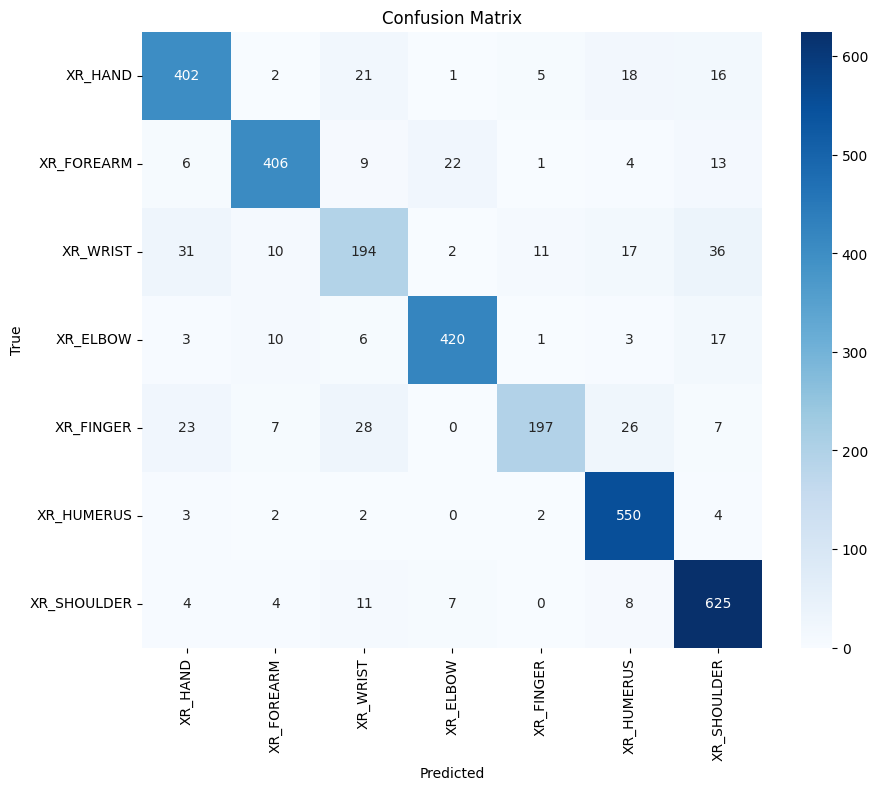

In [29]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=bone_types, yticklabels=bone_types)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Print a classification report with additional metrics
class_report = classification_report(y_true, y_pred_classes, target_names=bone_types)
print(class_report)

              precision    recall  f1-score   support

     XR_HAND       0.85      0.86      0.86       465
  XR_FOREARM       0.92      0.88      0.90       461
    XR_WRIST       0.72      0.64      0.68       301
    XR_ELBOW       0.93      0.91      0.92       460
   XR_FINGER       0.91      0.68      0.78       288
  XR_HUMERUS       0.88      0.98      0.93       563
 XR_SHOULDER       0.87      0.95      0.91       659

    accuracy                           0.87      3197
   macro avg       0.87      0.84      0.85      3197
weighted avg       0.87      0.87      0.87      3197



#save model

In [ ]:
cnn_model.save('/content/drive/My Drive/Project/cnn_model_2.h5')